# High-Dimensional Regression

In [5]:
#Load the dataset wagedata.csv
import pandas as pd

dt = pd.read_csv("wagedata.csv")
print(dt.head())
#This simple dataset (from the introductory statistics textbook "Statistical Sleuth" by Ramsey and Schafer) contains weekly wages in 1987
#for a sample of 25437 males between the ages of 18 and 70 who worked full-time along with their years of education, years of experience,
#indicator variable for whether they worked near a city, and a code for the region in the US where they worked. 

    Region   MetropolitanStatus  Exper  Educ  WeeklyEarnings
0    South  NotMetropolitanArea      8    12          859.71
1  Midwest     MetropolitanArea     30    12          786.73
2     West     MetropolitanArea     31    14         1424.50
3     West     MetropolitanArea     17    16          959.16
4     West     MetropolitanArea      6    12          154.32


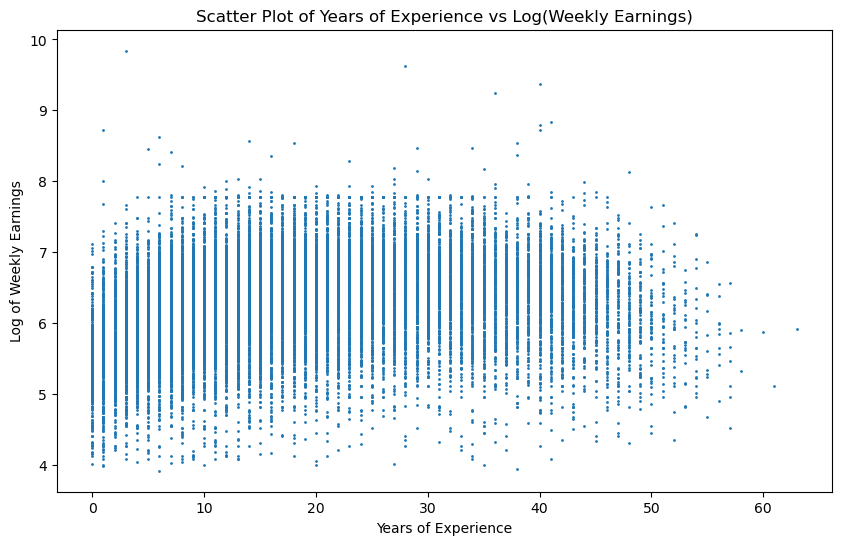

In [63]:
#We shall fit regression models with log(Weekly Earnings) as the response variable and Years of Experience as the covariate
#We shall work with log(Weekly Earnings) as response instead of Weekly Earnings for better interpretability
#Let us plot these two variables:
import numpy as np
y = np.log(dt['WeeklyEarnings'])
x = dt['Exper']
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6))
plt.scatter(x, y, s = 1)
plt.xlabel('Years of Experience')
plt.ylabel('Log of Weekly Earnings')
plt.title('Scatter Plot of Years of Experience vs Log(Weekly Earnings)')
plt.show()

                            OLS Regression Results                            
Dep. Variable:         WeeklyEarnings   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1311.
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          4.67e-280
Time:                        10:32:03   Log-Likelihood:                -23459.
No. Observations:               25437   AIC:                         4.692e+04
Df Residuals:                   25435   BIC:                         4.694e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0704      0.007    875.641      0.0

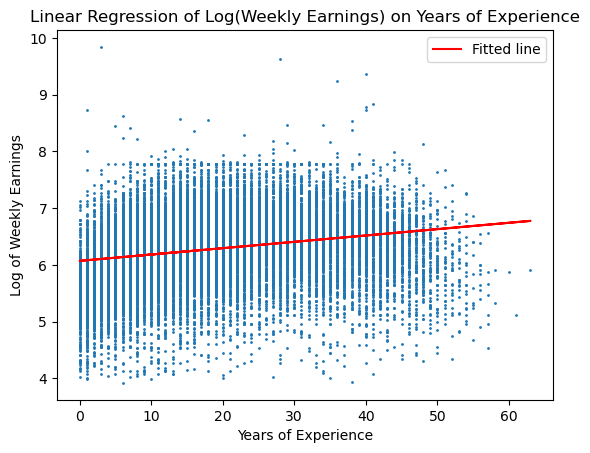

In [22]:
#The simplest model to fit is linear regression: y = b0 + b1 x
import statsmodels.api as sm

X = sm.add_constant(x) #adding intercept
model_1 = sm.OLS(y, X).fit()

print(model_1.summary())

#Plotting the fitted line on the scatter plot
plt.figure(figsize = (10, 6))
plt.scatter(x, y, s = 1)
plt.plot(x, model_1.predict(X), color = 'red', label = 'Fitted line')
plt.xlabel('Years of Experience')
plt.ylabel('Log of Weekly Earnings')
plt.title('Linear Regression of Log(Weekly Earnings) on Years of Experience')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:         WeeklyEarnings   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     1939.
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:32:05   Log-Likelihood:                -22294.
No. Observations:               25437   AIC:                         4.459e+04
Df Residuals:                   25434   BIC:                         4.462e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.6996      0.010    569.429   

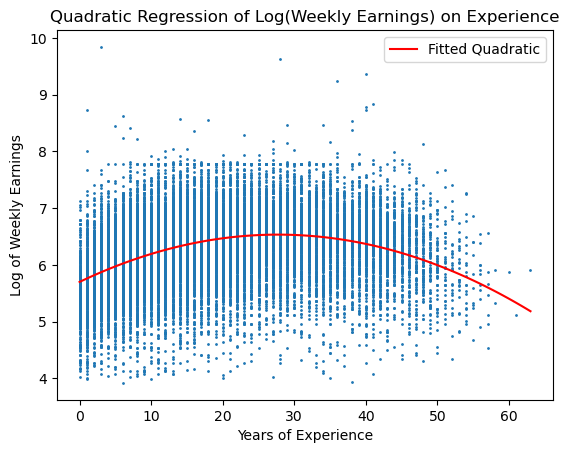

In [23]:
# The coefficient of Exper in the above model is 0.0112. What is its interpretation?
#The interpretation is that the Weekly Wage increase by about 1.12% for every additional one year of experience.
#From the scatter plot, a line clearly does not give good fits. 
#It is common to fit a quadratic here. 

X = sm.add_constant(x)
X['Exper_Square'] = np.square(x)
model_2 = sm.OLS(y, X).fit()

print(model_2.summary())

#Plotting the fitted quadratic on the scatter plot

b0, b1, b2 = model_2.params
x_range = np.linspace(x.min(), x.max(), 100)
fitted_model_2 = b0 + b1*x_range + b2*np.square(x_range)

plt.figure(figsize = (10, 6))
plt.scatter(x, y, s = 1)
plt.plot(x_range,fitted_model_2, color = 'red', label = 'Fitted Quadratic')
plt.xlabel('Years of Experience')
plt.ylabel('Log of Weekly Earnings')
plt.title('Quadratic Regression of Log(Weekly Earnings) on Experience')
plt.legend()
plt.show()

In [27]:
#Visually this gives a better fit than before. 
#Also the log-likelihood is much improved
#Interpretation of the coefficients is now trickier because of the square term
#Now the percentage increase for an additional year of experience is given by: 
#100*(b1 + 2*Exper*b2 + b2). For example if Exper = 0, then this is 100*b1 = 6%
#If Exper = 25, then this is 100*(b1 + 50*b2+b2) = 
exper_value = 35
perc_increase = 100*(b1 + 2*exper_value*b2 + b2)
print(perc_increase)

-1.687392090732321


In [28]:
#The point where the quadratic goes from increasing to decreasing is given by: 
peak_quadratic = -b1/(2*b2)
print(peak_quadratic)

27.720605951694704


                            OLS Regression Results                            
Dep. Variable:         WeeklyEarnings   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     1653.
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:02:50   Log-Likelihood:                -22545.
No. Observations:               25437   AIC:                         4.510e+04
Df Residuals:                   25434   BIC:                         4.512e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.8595    

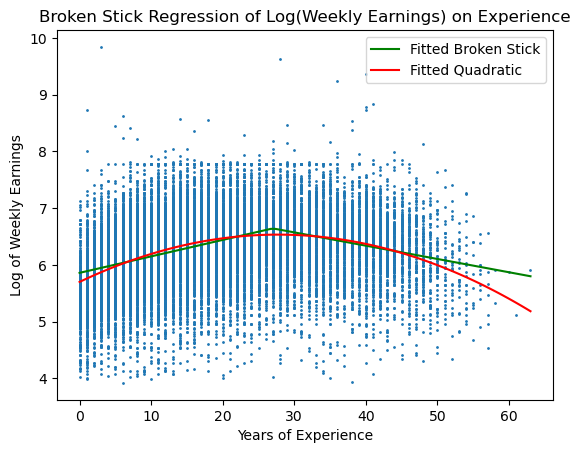

In [39]:
#Adding a quadratic term is not the only way of modeling here. 
#Here is another way. Suppose we go back to the linear model, and instead of
#adding the quadratic term, we add the term (x - 27)_+ leading to the model:
#y = b0 + b1 x + b2 (x - 27)_+
#This model keeps the slope b1 for x smaller than 27, but after 27 it modifies the slope to b1 + b2
#We would expect b2 to be negative. 
#This model can also be fit by usual linear regression

X = sm.add_constant(x) #adding intercept
X['pos_part_x_minus_27'] = np.maximum(x - 27, 0)
model_3 = sm.OLS(y, X).fit()

print(model_3.summary())

#Plotting the fitted quadratic on the scatter plot

b0, b1, b2 = model_3.params
x_range = np.linspace(x.min(), x.max(), 100)
fitted_model_3 = b0 + b1*x_range + b2*np.maximum(x_range-27,0)

plt.figure(figsize = (10, 6))
plt.scatter(x, y, s = 1)
plt.plot(x_range,fitted_model_3, color = 'green', label = 'Fitted Broken Stick')
plt.plot(x_range, fitted_model_2, color = 'red', label = 'Fitted Quadratic')
plt.xlabel('Years of Experience')
plt.ylabel('Log of Weekly Earnings')
plt.title('Broken Stick Regression of Log(Weekly Earnings) on Experience')
plt.legend()
plt.show()

In [32]:
#This model gives a log-likelihood that is smaller than the quadratic model (indicating the quadratic
#model is a better fit). However, the coefficients in this model are easier to interpret
#corresponding to the quadratic model. 
#For x <= 27, wages increase by 100*b1 = 2.9% for every additional year in experience
#For x >= 27, wages increase by 100*(b1 + b2) = -2.34% for every additional year in experience
print(100*(b1 + b2))

-2.3422621148239284


In [44]:
#This model is sometimes called broken stick regression with "knot" chosen to be 27.
#The choice of the knot point is crucial. It is possible that a different choice of knot
#will lead to a larger log-likelihood. One can search over all possible knots and then 
#choose the knot with the highest log-likelihood:
best_knot = None
highest_log_likelihood = -np.inf

for knot in range(1, 63):
    X = sm.add_constant(x)
    X['knot_variable'] = np.maximum(x - knot, 0)
    model_knot = sm.OLS(y, X).fit()
    if model_knot.llf > highest_log_likelihood:
        highest_log_likelihood = model_knot.llf
        best_knot = knot

print(f"The knot with highest log-likelihood is: {best_knot}")
print(f"Highest Log-Likelihood: {highest_log_likelihood}")


The knot with highest log-likelihood is: 17
Highest Log-Likelihood: -22398.051362075297


                            OLS Regression Results                            
Dep. Variable:         WeeklyEarnings   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     1819.
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:35:30   Log-Likelihood:                -22398.
No. Observations:               25437   AIC:                         4.480e+04
Df Residuals:                   25434   BIC:                         4.483e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.7143      0.010    567.213

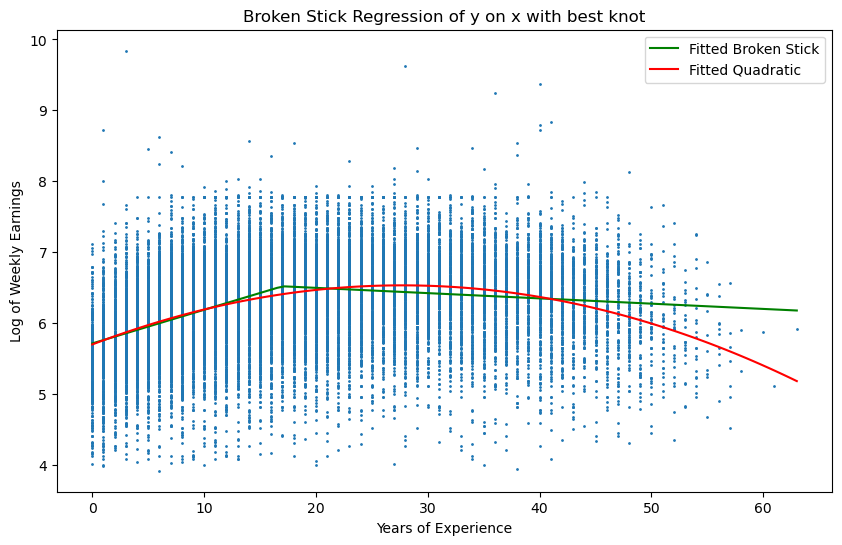

In [64]:
#We can now fit the model with the best_knot
X = sm.add_constant(x) #adding intercept
X['knot_variable'] = np.maximum(x - best_knot, 0)
model_4 = sm.OLS(y, X).fit()

print(model_4.summary())

#Plotting the fitted quadratic on the scatter plot

b0, b1, b2 = model_4.params
x_range = np.linspace(x.min(), x.max(), 100)
fitted_model_4 = b0 + b1*x_range + b2*np.maximum(x_range-best_knot,0)

plt.figure(figsize = (10, 6))
plt.scatter(x, y, s = 1)
plt.plot(x_range,fitted_model_4, color = 'green', label = 'Fitted Broken Stick')
plt.plot(x_range,fitted_model_2, color = 'red', label = 'Fitted Quadratic')
plt.xlabel('Years of Experience')
plt.ylabel('Log of Weekly Earnings')
plt.title('Broken Stick Regression of y on x with best knot')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:         WeeklyEarnings   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     1267.
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:34:55   Log-Likelihood:                -22327.
No. Observations:               25437   AIC:                         4.466e+04
Df Residuals:                   25433   BIC:                         4.470e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.7340      0.010    563.180

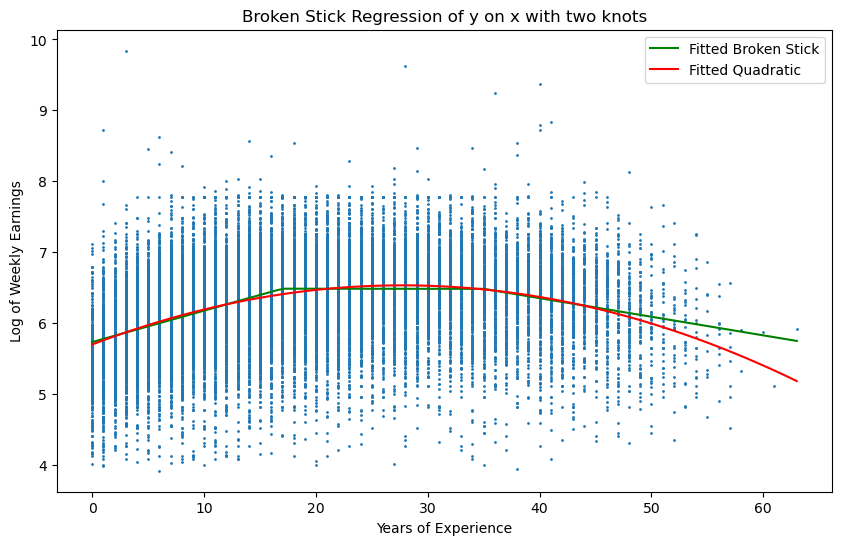

In [62]:
#We can further improve the broken stick regression model by adding more knot variables. 
#Suppose we add another knot variable at 35:
new_knot = 35
X = sm.add_constant(x) #adding intercept
X['knot_variable'] = np.maximum(x - best_knot, 0)
X['another_knot'] = np.maximum(x - new_knot, 0)

model_5 = sm.OLS(y, X).fit()

print(model_5.summary())

#Plotting the fitted quadratic on the scatter plot

b0, b1, b2, b3 = model_5.params
x_range = np.linspace(x.min(), x.max(), 100)
fitted_model_5 = b0 + b1*x_range + b2*np.maximum(x_range-best_knot,0) + b3 * np.maximum(x_range - new_knot, 0)

plt.figure(figsize = (10, 6))
plt.scatter(x, y, s = 1)
plt.plot(x_range,fitted_model_5, color = 'green', label = 'Fitted Broken Stick')
plt.plot(x_range,fitted_model_2, color = 'red', label = 'Fitted Quadratic')
plt.xlabel('Years of Experience')
plt.ylabel('Log of Weekly Earnings')
plt.title('Broken Stick Regression of y on x with two knots')
plt.legend()
plt.show()

In [43]:
#Now what is the interpretation of the coefficients:
#for x < 17, the slope is b1. So Wages increase by 100*b1 = 4.42% for every one year increase in experience
# for x between 17 and 35, slope is b1 + b2. So wages increase by 100*(b1 + b2) for every one year increase in experience:
print(100*(b1 + b2))
#for x larger than 35, slope is b1 + b2 + b3. So wages increase by 100*(b1 + b2 + b3):
print(100*(b1 + b2 + b3))

-0.011413982590526006
-2.6233912674073814


In [47]:
#We can now keep going by adding more knot variables. Suppose now that we decide to add a whole bunch of knots
#from 1, 2, 3, ..., 62. This can also be fit by linear regression as follows:
X = sm.add_constant(x) #adding intercept

for knot in range(1, 63):
    X[f'knot_{knot}'] = np.maximum(x - knot, 0)

model_all_knots = sm.OLS(y, X).fit()

print(model_all_knots.summary())

                            OLS Regression Results                            
Dep. Variable:         WeeklyEarnings   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     67.42
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:18:28   Log-Likelihood:                -22188.
No. Observations:               25437   AIC:                         4.450e+04
Df Residuals:                   25375   BIC:                         4.501e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4711      0.030    185.217      0.0

In [48]:
#This can be viewed as a "High-Dimensional" Regression model. Note that its AIC is smaller than that of the Quadratic model
#But its BIC is larger than the Quadratic model. 
#How to interpret the coefficients of this model?

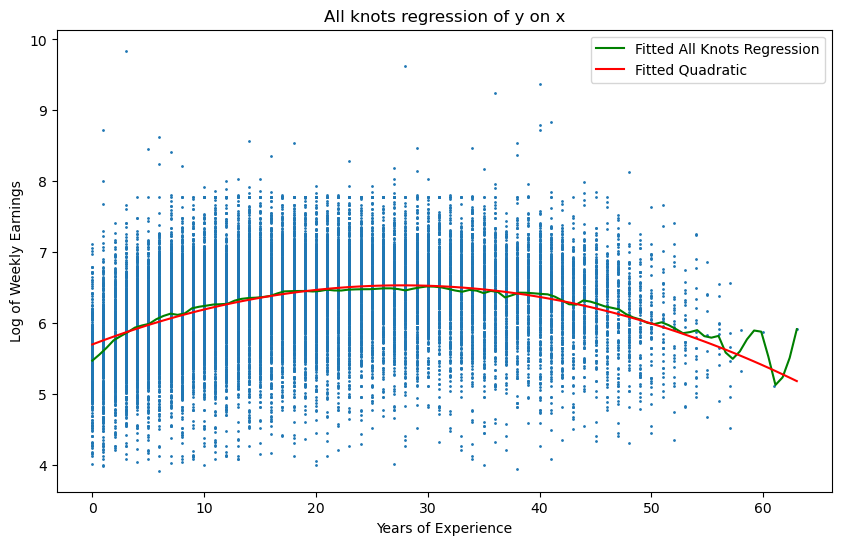

In [61]:
#Plotting the fitted values of this model: 
# Generate x_range for plotting
x_range = np.linspace(x.min(), x.max(), 100)

# Prepare a DataFrame for x_range
X_range = pd.DataFrame({'const': 1, 'x': x_range})
for knot in range(1, 63):
    X_range[f'knot_{knot}'] = np.maximum(X_range['x'] - knot, 0)

fitted_model_all_knots = model_all_knots.predict(X_range)

plt.figure(figsize = (10, 6))
plt.scatter(x, y, s = 1)
plt.plot(x_range,fitted_model_all_knots, color = 'green', label = 'Fitted All Knots Regression')
plt.plot(x_range,fitted_model_2, color = 'red', label = 'Fitted Quadratic')
plt.xlabel('Years of Experience')
plt.ylabel('Log of Weekly Earnings')
plt.title('All knots regression of y on x')
plt.legend()
plt.show()

In [65]:
#The green fit seems fairly close to the quadratic fit but it wiggles a bit. 
#The wigglyness leads to the coefficients not being super-interpretable. 
#In this example, we have many (25437) observations
len(y)
#Suppose we now switch to a smaller dataset by randomly sampling 500 observations from this full dataset

25437

In [67]:
#Repeating the analysis on a smaller dataset: 
n = 500
random_seed = 42
dt_small = dt.sample(n = 500, random_state = random_seed)
print(dt_small.shape)
print(dt_small.head())

(500, 5)
          Region   MetropolitanStatus  Exper  Educ  WeeklyEarnings
8735        West     MetropolitanArea     19    14          735.99
13369  Northeast  NotMetropolitanArea     15    16          807.22
5512     Midwest  NotMetropolitanArea     18    16          341.88
24277      South  NotMetropolitanArea     32    12          240.38
24959      South     MetropolitanArea     14    16         1210.83


                            OLS Regression Results                            
Dep. Variable:         WeeklyEarnings   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     55.83
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           1.34e-22
Time:                        13:47:28   Log-Likelihood:                -405.85
No. Observations:                 500   AIC:                             817.7
Df Residuals:                     497   BIC:                             830.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.6176      0.069     81.159   

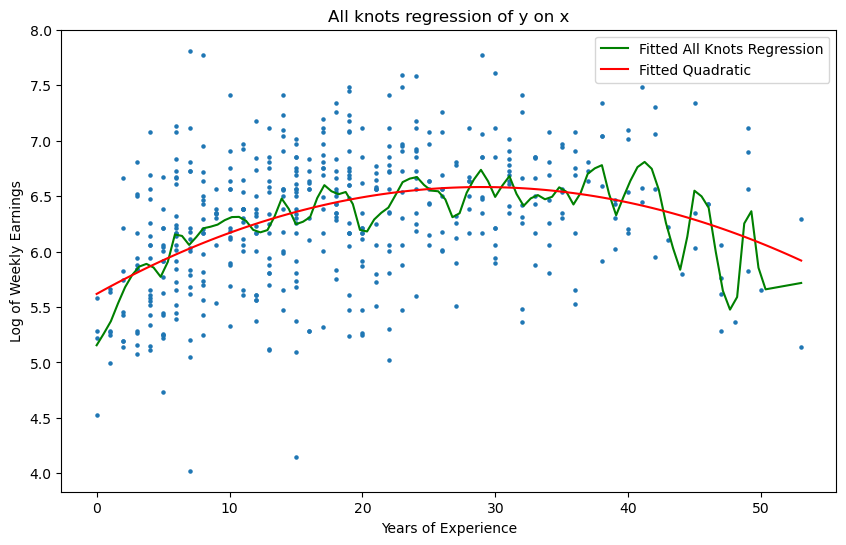

In [193]:
#Let us now repeat the exercise fitting the quadratic model as well as the all-knots regression model on this smaller dataset: 
y = np.log(dt_small['WeeklyEarnings'])
x = dt_small['Exper']

#Quadratic model: 
X = sm.add_constant(x)
X['Exper_Square'] = np.square(x)
model_quad = sm.OLS(y, X).fit()

print(model_quad.summary())

#Plotting the fitted quadratic on the scatter plot
b0, b1, b2 = model_quad.params
x_range = np.linspace(x.min(), x.max(), 100)
fitted_model_quad = b0 + b1*x_range + b2*np.square(x_range)

X_all_knots = sm.add_constant(x) #adding intercept
for knot in range(1, 51):
    X_all_knots[f'knot_{knot}'] = np.maximum(x - knot, 0)
model_all_knots = sm.OLS(y, X_all_knots).fit()

print(model_all_knots.summary())

# Prepare a DataFrame for x_range
X_range = pd.DataFrame({'const': 1, 'x': x_range})
for knot in range(1, 51):
    X_range[f'knot_{knot}'] = np.maximum(X_range['x'] - knot, 0)

fitted_model_all_knots = model_all_knots.predict(X_range)

plt.figure(figsize = (10, 6))
plt.scatter(x, y, s = 5)
plt.plot(x_range,fitted_model_all_knots, color = 'green', label = 'Fitted All Knots Regression')
plt.plot(x_range,fitted_model_quad, color = 'red', label = 'Fitted Quadratic')
plt.xlabel('Years of Experience')
plt.ylabel('Log of Weekly Earnings')
plt.title('All knots regression of y on x')
plt.legend()
plt.show()

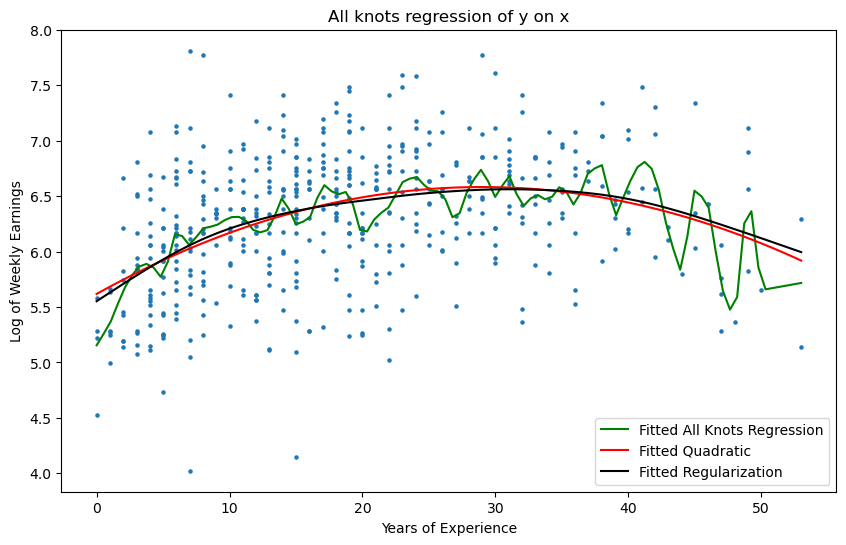

In [221]:
#Now by the usual indicators (AIC and BIC), this model overfits and is considered worse than the quadratic model. 
#This is a typical high-dimensional regression model. Regularization is an idea to fix overfitting. 
#Bayesian posterior mean corresponding to the prior b2, b3, ... i.i.d N(0, tau^2)

C = 10 ** 6 #some large value
tau = 0.01
sig = 0.6

kmax = 50

Q0 = np.diag([C, C] + [tau ** 2] * kmax) #this is the prior covariance matrix of b0, b1, b2, ...b(kmax + 1)
#Q0 is a diagonal matrix with C in the first two entries and the rest of entries equal tau^2

TempMat = np.linalg.inv((sig**2) * np.linalg.inv(Q0) + X_all_knots.T @ X_all_knots) #this is the matrix which
#multiplies X^T Y to give the posterior mean
post_mean = TempMat @ (X_all_knots.T @ y.to_numpy().reshape(-1, 1))

#calculating the fitted values for a grid of x-values:
x_range = np.linspace(x.min(), x.max(), 100)

X_range = pd.DataFrame({'const': 1, 'x': x_range})
for knot in range(1, 51):
    X_range[f'knot_{knot}'] = np.maximum(x_range - knot, 0)

fitted_model_regularized = X_range.values @ post_mean


plt.figure(figsize = (10, 6))
plt.scatter(x, y, s = 5)
plt.plot(x_range,fitted_model_all_knots, color = 'green', label = 'Fitted All Knots Regression')
plt.plot(x_range,fitted_model_quad, color = 'red', label = 'Fitted Quadratic')
plt.plot(x_range,fitted_model_regularized, color = 'black', label = 'Fitted Regularization')
plt.xlabel('Years of Experience')
plt.ylabel('Log of Weekly Earnings')
plt.title('All knots regression of y on x')
plt.legend()
plt.show()

In [219]:
##### Likelihood for tau and sigma:
taugrid = np.logspace(np.log10(0.001), np.log10(0.1), 50)
siggrid = np.logspace(np.log10(0.1), np.log10(1), 50)
g = pd.DataFrame([(tau, sig) for tau in taugrid for sig in siggrid], columns=['tau', 'sig'])

C = 10 ** 6
for i in range(len(g)):
    tau_val = g.loc[i, 'tau']
    sig_val = g.loc[i, 'sig']
    Q0 = np.diag([C, C] + [tau_val ** 2] * kmax)
    Sigmat = X_all_knots.values @ Q0 @ X_all_knots.values.T + np.diag([sig_val ** 2] * n)
    cov_inv = np.linalg.inv(Sigmat)
    sign, log_cov_det = np.linalg.slogdet(Sigmat)
    norm_factor = n*np.log(2*np.pi) + log_cov_det
    g.loc[i, 'loglik'] = -0.5 * (norm_factor + y.T @ cov_inv @ y)

ind_max = g['loglik'].idxmax()
print(g.loc[ind_max])

tau         0.013895
sig         0.542868
loglik   -432.731872
Name: 1436, dtype: float64


In [220]:
#The best values of tau and sig selected are
tau_best = g.loc[ind_max, 'tau']
sig_best = g.loc[ind_max, 'sig']
print(tau_best, sig_best)

0.013894954943731374 0.5428675439323859


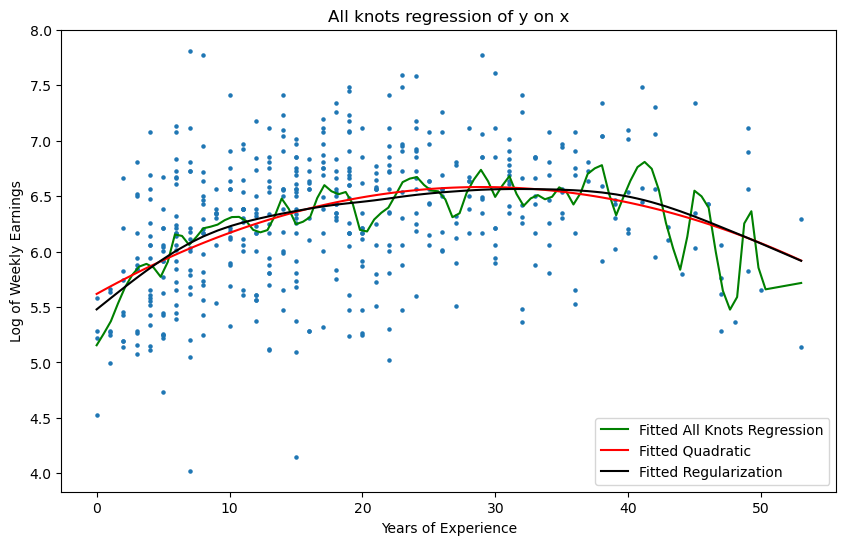

In [222]:
#With best values of tau and sig:
C = 10 ** 6 #some large value
tau = tau_best
sig = sig_best

kmax = 50

Q0 = np.diag([C, C] + [tau ** 2] * kmax) #this is the prior covariance matrix of b0, b1, b2, ...b(kmax + 1)
#Q0 is a diagonal matrix with C in the first two entries and the rest of entries equal tau^2

TempMat = np.linalg.inv((sig**2) * np.linalg.inv(Q0) + X_all_knots.T @ X_all_knots) #this is the matrix which
#multiplies X^T Y to give the posterior mean
post_mean = TempMat @ (X_all_knots.T @ y.to_numpy().reshape(-1, 1))

#calculating the fitted values for a grid of x-values:
x_range = np.linspace(x.min(), x.max(), 100)

X_range = pd.DataFrame({'const': 1, 'x': x_range})
for knot in range(1, 51):
    X_range[f'knot_{knot}'] = np.maximum(x_range - knot, 0)

fitted_model_regularized = X_range.values @ post_mean


plt.figure(figsize = (10, 6))
plt.scatter(x, y, s = 5)
plt.plot(x_range,fitted_model_all_knots, color = 'green', label = 'Fitted All Knots Regression')
plt.plot(x_range,fitted_model_quad, color = 'red', label = 'Fitted Quadratic')
plt.plot(x_range,fitted_model_regularized, color = 'black', label = 'Fitted Regularization')
plt.xlabel('Years of Experience')
plt.ylabel('Log of Weekly Earnings')
plt.title('All knots regression of y on x')
plt.legend()
plt.show()

In [223]:
#There exist some (small) differences between the quadratic fit and the regularized fit. 

In [229]:
#Another Example: 
dt = pd.read_csv("yahoo_trends_Nov2022.csv")
print(dt.head())
n = len(dt)
y = dt['y']
x = np.arange(1, n+1)

    y
0  39
1  38
2  38
3  38
4  41


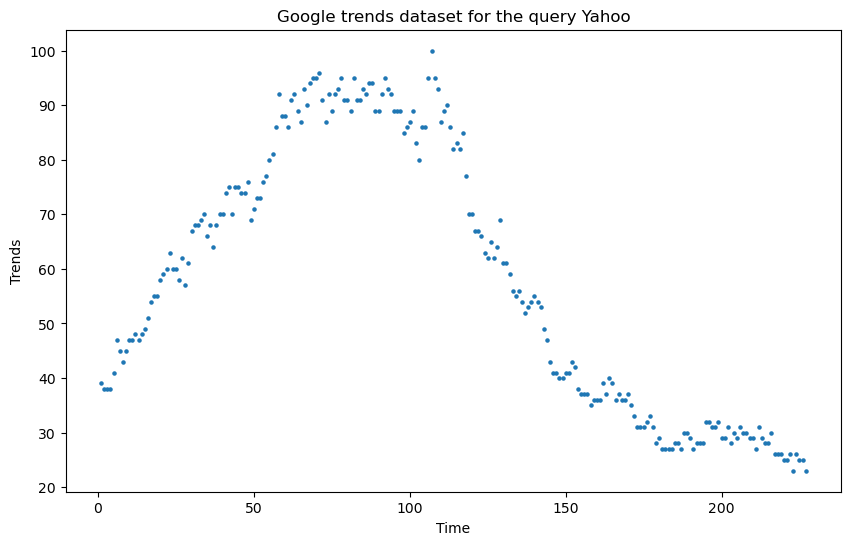

In [232]:
#Plotting the fitted line on the scatter plot
plt.figure(figsize = (10, 6))
plt.scatter(x, y, s = 5)
plt.xlabel('Time')
plt.ylabel('Trends')
plt.title('Google trends dataset for the query Yahoo')
plt.show()

In [249]:
# Create X_all_knots as a DataFrame with an intercept
X_all_knots = sm.add_constant(pd.DataFrame(x, columns=['x']))  # 'x' is now a column in the DataFrame

# Create a dictionary to hold all new knot columns
knot_columns = {}

# Generate knot columns
for knot in range(2, n):
    knot_columns[f'knot_{knot}'] = np.maximum(x - knot, 0)

# Convert the dictionary to a DataFrame and concatenate it with X_all_knots
knot_df = pd.DataFrame(knot_columns)
X_all_knots = pd.concat([X_all_knots, knot_df], axis=1)

In [252]:
##### Likelihood for tau and sigma:
taugrid = np.logspace(np.log10(0.1), np.log10(1), 50)
siggrid = np.logspace(np.log10(0.1), np.log10(5), 50)
g = pd.DataFrame([(tau, sig) for tau in taugrid for sig in siggrid], columns=['tau', 'sig'])

C = 10 ** 6
for i in range(len(g)):
    tau_val = g.loc[i, 'tau']
    sig_val = g.loc[i, 'sig']
    Q0 = np.diag([C, C] + [tau_val ** 2] * (n-2))
    Sigmat = X_all_knots.values @ Q0 @ X_all_knots.values.T + np.diag([sig_val ** 2] * n)
    cov_inv = np.linalg.inv(Sigmat)
    sign, log_cov_det = np.linalg.slogdet(Sigmat)
    norm_factor = n*np.log(2*np.pi) + log_cov_det
    g.loc[i, 'loglik'] = -0.5 * (norm_factor + y.T @ cov_inv @ y)

ind_max = g['loglik'].idxmax()
print(g.loc[ind_max])

tau         0.754312
sig         1.918208
loglik   -583.942469
Name: 2187, dtype: float64


In [253]:
#The best values of tau and sig selected are
tau_best = g.loc[ind_max, 'tau']
sig_best = g.loc[ind_max, 'sig']
print(tau_best, sig_best)

0.7543120063354617 1.9182080867904119


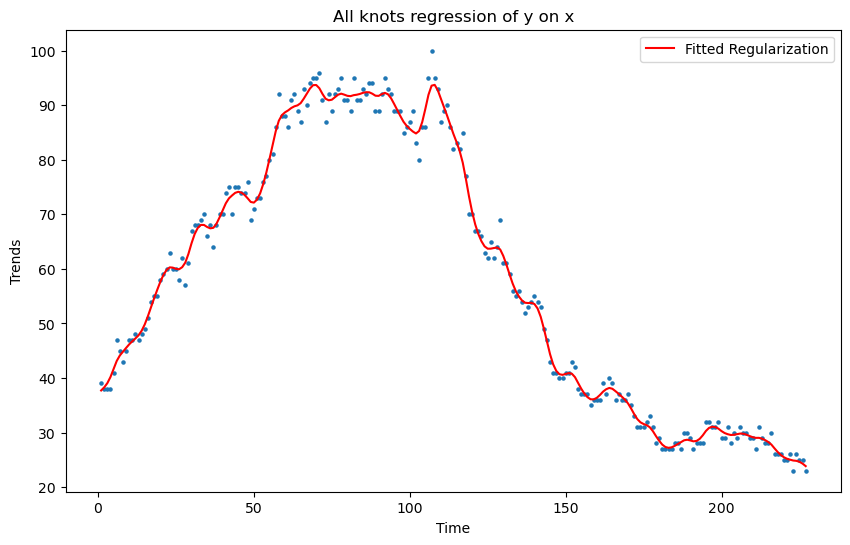

In [259]:
#With best values of tau and sig:
C = 10 ** 6 #some large value
tau = tau_best
sig = sig_best

Q0 = np.diag([C, C] + [tau ** 2] * (n-2)) #this is the prior covariance matrix of b0, b1, b2, ...b(kmax + 1)
#Q0 is a diagonal matrix with C in the first two entries and the rest of entries equal tau^2

TempMat = np.linalg.inv((sig**2) * np.linalg.inv(Q0) + X_all_knots.T @ X_all_knots) #this is the matrix which
#multiplies X^T Y to give the posterior mean
post_mean = TempMat @ (X_all_knots.T @ y.to_numpy().reshape(-1, 1))


fitted_model_regularized = X_all_knots.values @ post_mean


plt.figure(figsize = (10, 6))
plt.scatter(x, y, s = 5)
plt.plot(x,fitted_model_regularized, color = 'red', label = 'Fitted Regularization')
plt.xlabel('Time')
plt.ylabel('Trends')
plt.title('All knots regression of y on x')
plt.legend()
plt.show()